In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import random

In [2]:
url="https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/customer_segmentation.csv"
df = pd.read_csv(url)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


Ma'lumotlarni tozalash
Address ustuni matnli. Masofa hisoblashda esa bu ustundan foydalan olmaymiz, shuning bu ustunni tashglab yuboramiz.

In [3]:
df.drop('Address', axis=1, inplace=True)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


Customer Id ustunidan boshqa barcha ustunlarni normalizasiya qilamiz.

In [4]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
norm_data = StandardScaler().fit_transform(X)
norm_data

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

# Model
Dataset turli mijozlarning yoshi, ishlagan yillar soni, daromadi, qarzi ka'bi ma'lumotlardan iborat. Maqsadimiz shu ma'lumotlardan foydalangan holda mijozlarni truli klasterlarga ajratish.

In [9]:
k_means = KMeans(n_clusters=3, random_state=0).fit(norm_data)

In [15]:
k_means.labels_[0:10]

array([1, 0, 2, 1, 0, 0, 1, 1, 1, 0])

In [13]:
df['cluster'] = k_means.labels_
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,2
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,0


In [16]:
df.cluster.value_counts()

1    537
2    166
0    147
Name: cluster, dtype: int64

# Klasterlar haqida nima deya olamiz?
Har bir klaster sentrodini topish orqali kalsterlar haqida ma'lumot olishimiz mumkin. Buning uchun esa groupby va mean funksiyalaridan foydalanamiz

In [17]:
df.groupby('cluster').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
cluster,,,,,,,,,
0,424.408163,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.162393,13.915646
1,426.122905,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991
2,424.451807,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.993939,13.994578


Har bir klasterdagi mijozlar haqida qanday xulosa qilish mumkin?

Masalan, yoshiga (`Age`) qaraydigan bo'lsak 0-klaster katta yoshlar (43+), 1-klaster o'rta yosh (33+), 2-klaster yoshlar (31 gacha).

Har bir klasterni yaqqol ajratib turuvchi ustunlar bu `Income` (daromad) va `Year Employed` (necha yildan beri ishlashi) ekan.

Demak biz har klasterni quyidagicha ta'riflashimiz mumkin:
- 0-klaster - Katta yosh, uzoq tajribaga ega, katta daromad qiluvchi mijozlar.
- 1-klaster - Yosh, kam tajriba va kam daromad mijozlar.
- 2-klaster - O'rta yosh, 7+ yil tarjibaga ega, kam daromad mijozlar.

Umuman olganda siz aynan sizning biznesingiz uchun muhim ustunlar bo'yicha klasterlarga nom berishingiz mumkin, masalan moliya xizamtini yo'lga qo'ygan bo'lsangiz (muddatli to'lov, kredit) qarzlar (`Debt`) va qarzni qaytarmaganlik (`Deafulted`) ustunlariga ahamiyat bergan bo'lar edim.

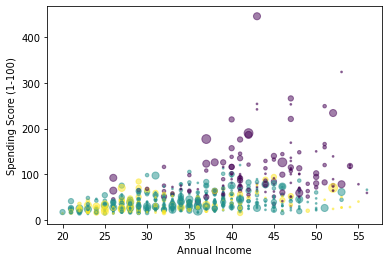

In [18]:
area = np.pi * (X[:, 1])**2
plt.scatter(X[:, 0], X[:, 3], s=area, c=k_means.labels_, alpha=0.5)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.show()

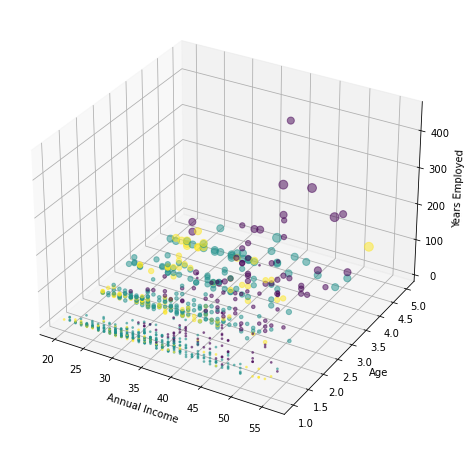

In [23]:
fig = plt.figure(figsize=(8, 8))
axes = plt.axes(projection='3d')
axes.scatter3D(X[:, 0], X[:, 1], X[:, 3], c=k_means.labels_, s=area, alpha=0.5)
axes.set_xlabel('Annual Income')
axes.set_ylabel('Age')
axes.set_zlabel('Spending Score (1-100)')
plt.show()

C:\Users\my\AppData\Local\Temp/ipykernel_10084/266918039.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=124)
C:\Users\my\AppData\Local\Temp/ipykernel_10084/266918039.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(X[:, 2], X[:, 0], X[:, 3], c=k_means.labels_.astype(np.float), s=area,

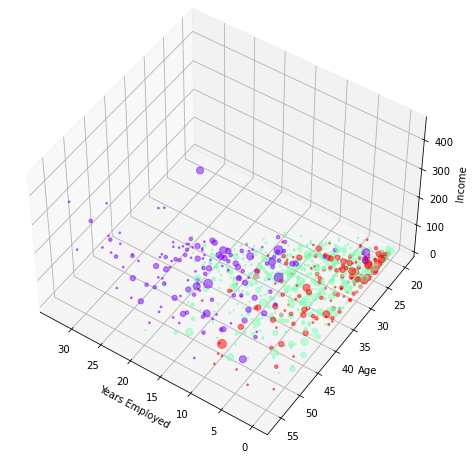

In [34]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=124)

ax.set_xlabel('Years Employed')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 2], X[:, 0], X[:, 3], c=k_means.labels_.astype(np.float), s=area, alpha=0.5, cmap='rainbow')
plt.show()